# DNN to predict the split tensile strength just using NDT

## Importing necessary libraries

In [1]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.keras.utils import plot_model
%matplotlib inline

### Charging the train and test datasets

In [2]:
# let's create a temporary variable npz, where we will store each of the two datasets
npz = np.load('Data_train.npz')
# we extract the inputs using the keyword under which we saved them # to ensure that they are all floats, let's also take care of that
train_inputs = npz['inputs'].astype(np.float32)
train_targets = npz['targets'].astype(np.float32)

# we load the test data in the temporary variable
npz = np.load('Data_test.npz')
# we create 2 variables that will contain the test inputs and the test targets
test_inputs, test_targets = npz['inputs'].astype(np.float32), npz['targets'].astype(np.float32)

## Defining the model

In [3]:
# Set the input and output sizes
input_size = 3
output_size = 1
# Use same hidden layer size for hidden layers. Not a necessity.
hidden_layer_size = 150
    
# define how the model will look like
model = tf.keras.Sequential()
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu',kernel_initializer='he_uniform',input_shape=(3,)), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu', kernel_initializer='he_uniform'), # 2th hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu', kernel_initializer='he_uniform'), # 3th hidden layer            
    tf.keras.layers.Dense(1) # output layer
])

# Choose the optimizer and the loss function

# we define the optimizer we'd like to use, 
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
my_optimizer= tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=my_optimizer, loss='mse', metrics=['mae'])

# Training
# That's where we train the model we have built.

# set the batch size
batch_size = 1

# set a maximum number of training epochs
max_epochs = 350

# set an early stopping mechanism
# let's set patience=3, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)

# fit the model
modelo=model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          validation_data=(test_inputs, test_targets), # validation data
          verbose =1 # making sure we get enough information about the training process
          )  

- val_mae: 0.1427
Epoch 203/350
228/228 [==============================] - 0s 1ms/step - loss: 0.0649 - mae: 0.1510 - val_loss: 0.0800 - val_mae: 0.1978
Epoch 204/350
228/228 [==============================] - 0s 1ms/step - loss: 0.0900 - mae: 0.1728 - val_loss: 0.0567 - val_mae: 0.1803
Epoch 205/350
228/228 [==============================] - 0s 1ms/step - loss: 0.0911 - mae: 0.1793 - val_loss: 0.0198 - val_mae: 0.1075
Epoch 206/350
228/228 [==============================] - 0s 1ms/step - loss: 0.0754 - mae: 0.1557 - val_loss: 0.0383 - val_mae: 0.1530
Epoch 207/350
228/228 [==============================] - 0s 1ms/step - loss: 0.0580 - mae: 0.1428 - val_loss: 0.0457 - val_mae: 0.1728
Epoch 208/350
228/228 [==============================] - 0s 1ms/step - loss: 0.0572 - mae: 0.1370 - val_loss: 0.0318 - val_mae: 0.1480
Epoch 209/350
228/228 [==============================] - 0s 1ms/step - loss: 0.0623 - mae: 0.1419 - val_loss: 0.0343 - val_mae: 0.1516
Epoch 210/350
228/228 [==============

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               600       
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151       
Total params: 46,051
Trainable params: 46,051
Non-trainable params: 0
_________________________________________________________________


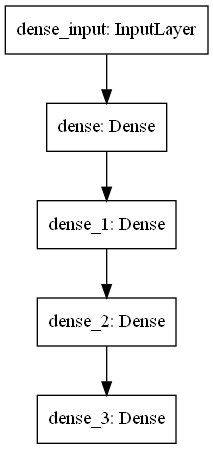

In [5]:

plot_model(model, to_file='multilayer_perceptron_graph.png')

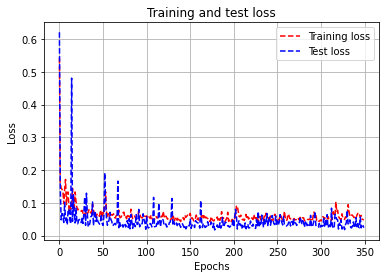

In [6]:
loss= modelo.history['loss']
val_loss = modelo.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
#plt.savefig("training_test.png",dpi=1800)

## Test the model 
The test is the absolute final instance. You should not test before you are completely done with adjusting your model.
If you adjust your model after testing, you will start overfitting the test dataset, which will defeat its purpose

In [7]:
test_loss= model.evaluate(test_inputs, test_targets)

2/2 [==============================] - 0s 1ms/step - loss: 0.0239 - mae: 0.1140


In [8]:
# Let's go to estimate the accuracy in both datasets
a=model.predict(train_inputs)
b=model.predict(test_inputs)

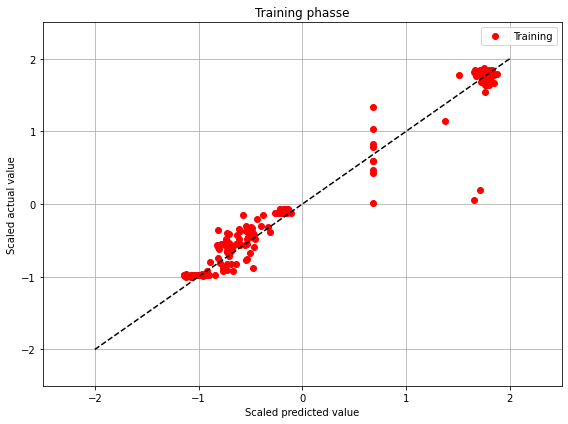

In [9]:
plt.figure(figsize=(8,6))
plt.plot(a, train_targets, 'ro', label='Training')
plt.title('Training phasse')
plt.xlabel('Scaled predicted value')
plt.ylabel('Scaled actual value')
plt.legend()
plt.axis([-2.5,2.5,-2.5,2.5])
x=np.linspace(-2,2);
y=x;
plt.plot(x,y,'k--')
plt.grid()
plt.tight_layout()
#plt.savefig("Training.png",dpi=1800)

In [10]:
r2_score(a,train_targets)

0.9607702885737262

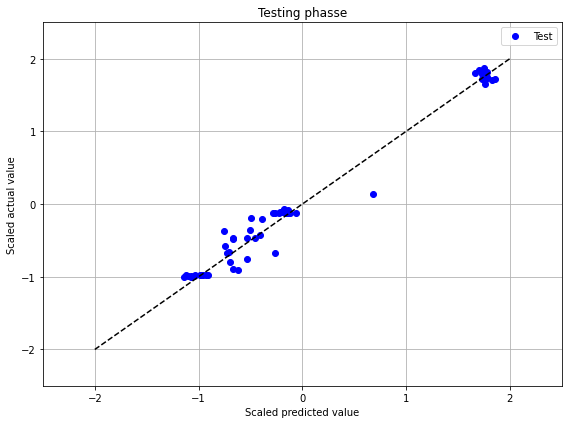

In [11]:
plt.figure(figsize=(8,6))
plt.plot(b, test_targets, 'bo', label='Test')
plt.title('Testing phasse')
plt.xlabel('Scaled predicted value')
plt.ylabel('Scaled actual value')
plt.legend()
plt.axis([-2.5,2.5,-2.5,2.5])
x=np.linspace(-2,2);
y=x;
plt.plot(x,y,'k--')
plt.grid()
plt.tight_layout()
#plt.savefig("Testing.png",dpi=1800)

In [12]:
r2_score(b,test_targets)


0.9772615629838118

In [13]:
# save model
model.save('final_model.h5')